# Tugas Perbaikan Citra
**Nama : Rahmat Aldino**

**Rombel : 2**


# Perbaikan citra image sharpening

In [2]:
image = cv2.imread('data/struk6.jpg')
#membuat array dan disimpan pada variabel kernel
kernel = np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)

In [3]:
image

array([[[228, 231, 229],
        [221, 224, 222],
        [217, 221, 216],
        ...,
        [155, 155, 155],
        [158, 159, 157],
        [123, 124, 122]],

       [[227, 230, 228],
        [219, 222, 220],
        [214, 218, 213],
        ...,
        [155, 155, 155],
        [159, 160, 158],
        [124, 125, 123]],

       [[227, 230, 228],
        [219, 222, 220],
        [214, 218, 213],
        ...,
        [156, 156, 156],
        [162, 163, 161],
        [127, 128, 126]],

       ...,

       [[ 65,  71,  82],
        [118, 124, 135],
        [147, 156, 166],
        ...,
        [117, 125, 142],
        [120, 128, 145],
        [120, 128, 145]],

       [[ 63,  69,  80],
        [120, 126, 137],
        [145, 154, 164],
        ...,
        [117, 125, 142],
        [119, 127, 144],
        [119, 127, 144]],

       [[ 60,  66,  77],
        [121, 127, 138],
        [143, 152, 162],
        ...,
        [117, 125, 142],
        [119, 127, 144],
        [118, 126, 143]]

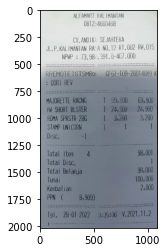

In [4]:
plt.imshow(image)

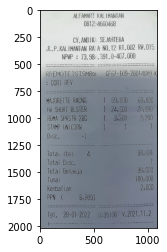

In [5]:
plt.imshow(sharpened)


---

# Perbaikan Citra Power Law (Gamma) Transformastion

In [1]:
# Power Law (Gamma) Transformation

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
gray_img = cv2.imread("data/struk6.jpg", cv2.IMREAD_GRAYSCALE)

In [8]:
# Tentukan nilai Gamma

gamma = 2

In [9]:
output_gamma = np.zeros(gray_img.shape)

In [10]:
for x, y in np.ndindex(gray_img.shape):
  output_gamma[x,y] = ((gray_img[x,y] / 255)**(1/gamma)) * 255

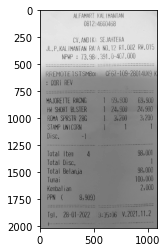

In [11]:
plt.imshow(gray_img, cmap="gray")

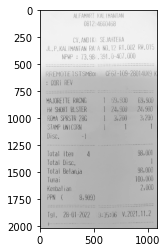

In [12]:
plt.imshow(output_gamma, cmap="gray")

---

# Perbaikan Citra Histogram Equalization

In [13]:
#Histogram Equalization

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
gray_img = cv2.imread("data/struk6.jpg", cv2.IMREAD_GRAYSCALE)

In [16]:
gray_img.shape

(2014, 1090)

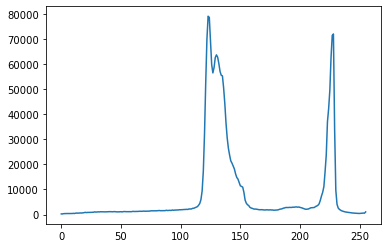

In [17]:
histo = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(histo)
plt.show()

In [18]:
# Cari nilai K
k = int(gray_img.max()).bit_length()
print(gray_img.max())
print(k)

255
8


In [19]:
# Mendapatkan nilai unique dan frekuensi 

(unique, counts) = np.unique(gray_img, return_counts=True)

In [20]:
len(unique)

256

In [21]:
print(unique)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [22]:
print(counts)

[  266   259   366   393   406   402   354   354   424   422   476   434
   553   597   560   603   643   625   681   748   884   793   849   853
   873   875   924   935  1077   978  1045  1083  1052  1126  1091  1094
  1067  1076  1120  1128  1140  1160  1119  1107  1166  1174  1086  1070
  1078  1117  1142  1065  1184  1196  1150  1146  1154  1140  1178  1161
  1281  1226  1226  1252  1254  1296  1323  1291  1311  1387  1329  1342
  1363  1331  1383  1493  1492  1490  1491  1492  1504  1574  1617  1540
  1551  1558  1615  1568  1708  1608  1653  1689  1628  1817  1702  1788
  1796  1789  1835  1930  1913  1944  2000  1964  2033  2080  2054  2222
  2248  2235  2481  2512  2714  2875  3150  3699  4417  5950  9412 17384
 32277 52451 69780 79087 78631 69131 59768 56489 58649 62616 63681 62755
 60218 57084 55554 55312 50523 44272 36527 30558 26431 23745 21412 20516
 19409 18218 16279 14817 14158 12774 11480 11194 10943  8848  5796  4538
  3917  3604  2902  2620  2477  2255  2182  2194  2

In [23]:
# Hitung distribusi kumulatif

cdx = np.zeros(len(counts))

cdx[0] = counts[0]

for i in range(1, len(counts)):
  cdx[i] = cdx[i-1] + counts[i]

print(cdx)

[2.660000e+02 5.250000e+02 8.910000e+02 1.284000e+03 1.690000e+03
 2.092000e+03 2.446000e+03 2.800000e+03 3.224000e+03 3.646000e+03
 4.122000e+03 4.556000e+03 5.109000e+03 5.706000e+03 6.266000e+03
 6.869000e+03 7.512000e+03 8.137000e+03 8.818000e+03 9.566000e+03
 1.045000e+04 1.124300e+04 1.209200e+04 1.294500e+04 1.381800e+04
 1.469300e+04 1.561700e+04 1.655200e+04 1.762900e+04 1.860700e+04
 1.965200e+04 2.073500e+04 2.178700e+04 2.291300e+04 2.400400e+04
 2.509800e+04 2.616500e+04 2.724100e+04 2.836100e+04 2.948900e+04
 3.062900e+04 3.178900e+04 3.290800e+04 3.401500e+04 3.518100e+04
 3.635500e+04 3.744100e+04 3.851100e+04 3.958900e+04 4.070600e+04
 4.184800e+04 4.291300e+04 4.409700e+04 4.529300e+04 4.644300e+04
 4.758900e+04 4.874300e+04 4.988300e+04 5.106100e+04 5.222200e+04
 5.350300e+04 5.472900e+04 5.595500e+04 5.720700e+04 5.846100e+04
 5.975700e+04 6.108000e+04 6.237100e+04 6.368200e+04 6.506900e+04
 6.639800e+04 6.774000e+04 6.910300e+04 7.043400e+04 7.181700e+04
 7.331000e

In [24]:
(height,width) = gray_img.shape

In [25]:
#Menghitung nilai Ko

wh = height * width
dj = (2**k)-1

ko = np.zeros(len(counts))

for i in range(0, len(counts)):
  ko[i] = round((cdx[i]*dj)/wh)
  
print(ko)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   3.   3.   3.   3.   3.   3.   3.   3.   4.   4.
   4.   4.   4.   4.   4.   4.   5.   5.   5.   5.   5.   5.   5.   6.
   6.   6.   6.   6.   6.   6.   6.   7.   7.   7.   7.   7.   7.   8.
   8.   8.   8.   8.   8.   9.   9.   9.   9.   9.   9.  10.  10.  10.
  10.  10.  10.  11.  11.  11.  11.  11.  12.  12.  12.  12.  12.  13.
  13.  13.  13.  14.  14.  14.  14.  14.  15.  15.  15.  16.  16.  16.
  16.  17.  17.  18.  18.  19.  20.  22.  26.  32.  40.  49.  58.  66.
  73.  80.  86.  94. 101. 108. 115. 122. 128. 135. 141. 146. 150. 154.
 157. 160. 162. 164. 167. 169. 171. 172. 174. 176. 177. 178. 179. 180.
 181. 182. 182. 183. 183. 183. 183. 184. 184. 184. 184. 185. 185. 185.
 185. 186. 186. 186. 186. 186. 187. 187. 187. 187. 188. 188. 188. 188.
 188. 189. 189. 189. 189. 190. 190. 190. 191. 191. 191. 192. 192. 192.
 193. 

In [26]:
output = np.zeros(gray_img.shape)

for x,y in np.ndindex(gray_img.shape):
  output[x,y] = ko[int(np.where(unique == gray_img[x,y])[0])]

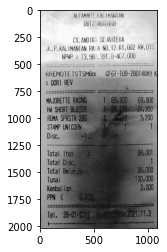

In [27]:
plt.imshow(output, cmap="gray")

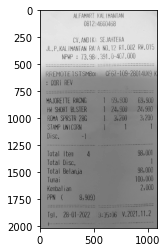

In [28]:
plt.imshow(gray_img, cmap="gray")

In [29]:
import seaborn as sns

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram gambar setelah perbaikan histogram')

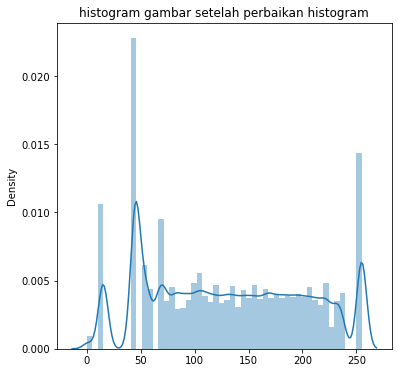

In [30]:
figure = plt.figure(figsize=(6,6))
sns.distplot(output)
plt.title("histogram gambar setelah perbaikan histogram")

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram gambar sebelum perbaikan')

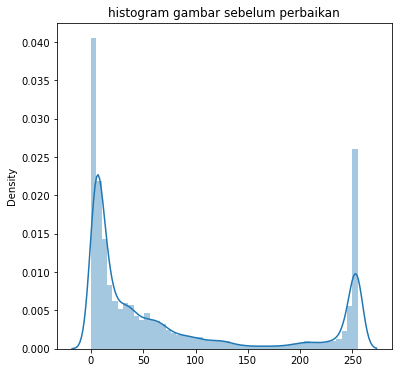

In [31]:
figure = plt.figure(figsize=(6,6))
sns.distplot(gray_img)
plt.title("histogram gambar sebelum perbaikan")

---

# Perbaikan Citra Image Brightness

In [32]:
gray_baru = gray_img.flatten()
add = cv2.add(gray_baru,80)

In [33]:
gray_baru.max()

255

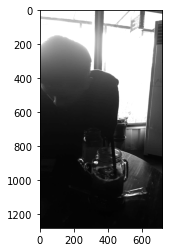

In [34]:
plt.imshow(add.reshape(1280, 720), cmap="gray")

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram gambar setelah perbaikan image brightness')

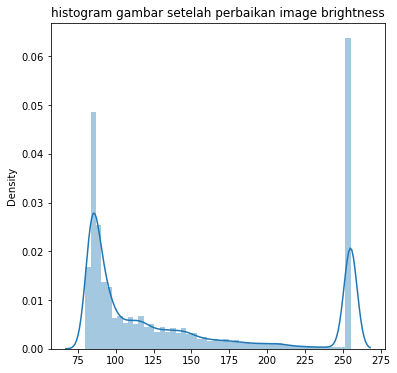

In [35]:
figure = plt.figure(figsize=(6,6))
sns.distplot(add)
plt.title("histogram gambar setelah perbaikan image brightness")

---

# Perbaikan Citra Image Smoothing

In [42]:
img2 = cv2.imread('gambarku.jpg', cv2.IMREAD_GRAYSCALE)

averaging = cv2.blur(img,(5,5))
gaussian = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)


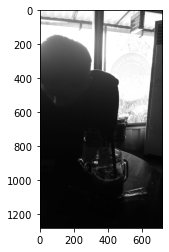

In [45]:
plt.imshow(img2, cmap="gray")

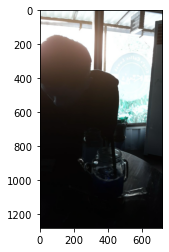

In [46]:
plt.imshow(median, cmap="gray")

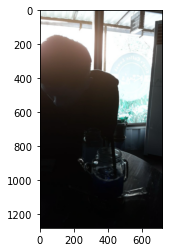

In [47]:
plt.imshow(gaussian, cmap="gray")

In [49]:
import nbconvert

In [50]:
nbconvert.PDFExporter()